MNIST HAND-WRITTEN DIGIT RECOGNITION

In [1]:
# immporting necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import keras

In [3]:
from keras.datasets import mnist

Loading data using keras as train data and test data

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Plotting the image(color image)

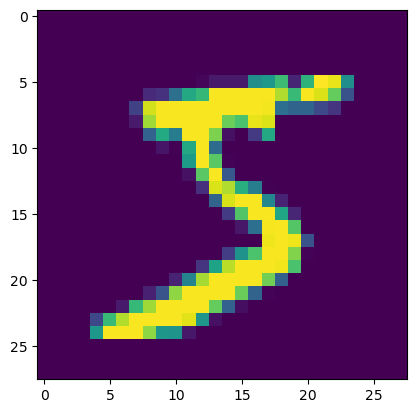

In [6]:
plt.imshow(x_train[0])

Plotting the grey scale image

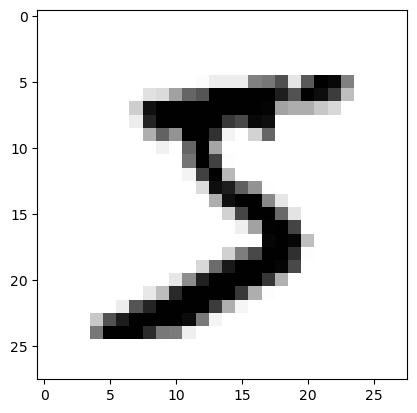

In [7]:
plt.imshow(x_train[0], cmap = 'binary')

Data pre-processing

In [8]:
# normalizing the image, values lie in range 0 to 1, both inclusive
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

In [9]:
# reshaping the images because model takes in 3D data
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

Applying one-hot encoding on output labels, since there are 10 output labels and it is a classification problem

In [11]:
# implementing it using keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [12]:
y_train.shape

(60000, 10)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

Building the model

In [14]:
# importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [15]:
# creating object of sequential model
model = Sequential()

In [16]:
# adding deep neural layers to model
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

# to prevent overfitting we add dropout
model.add(Dropout(0.25))

model.add(Dense(10, activation = 'softmax'))

In handwritten digit recognition, Conv2D is responsible for extracting important features from the input images. These features help the neural network accurately recognize and classify the digits. By applying multiple filters, Conv2D learns to detect patterns and textures, such as edges and curves, at different orientations and scales. It also allows the network to recognize digits regardless of their position within the image. Conv2D layers are stacked to create a deep architecture, enabling the network to learn both low-level details and high-level concepts. The use of pooling layers reduces the spatial dimensions of the features, focusing on the most relevant information. Finally, fully connected layers classify the digits based on the learned features. Overall, Conv2D plays a crucial role in capturing meaningful information and improving the accuracy of handwritten digit recognition models.


MaxPooling (MaxPool) in handwritten digit recognition has the following concise roles:

Downsampling: MaxPool reduces the spatial dimensions of feature maps obtained from Convolutional layers.

Translation invariance: It enables recognizing features regardless of their precise location in the image, making the network robust to small shifts.

Feature selection: MaxPool emphasizes the most prominent features by selecting the maximum value within each region, suppressing irrelevant information.

Efficiency: Downsampling reduces parameters, computations, and memory requirements, making the network more efficient.

In summary, MaxPool reduces dimensions, enhances translation invariance, selects important features, and improves the overall efficiency of the handwritten digit recognition network

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)               0

In [18]:
# this line of code is used for gradient descent using accuracy as metric and adam as optimizer
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [19]:
# adding callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint

# early stopping
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)

# model checkpoint
mc = ModelCheckpoint("./bestmodel.h5", monitor='val_acc', verbose=1, save_best_only = True)

cb = [es, mc]

In [21]:
# training the model
his = model.fit(x_train, y_train, epochs=50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1313/1313 [==============================] - 19s 15ms/step - loss: 0.0676 - accuracy: 0.9788 - val_loss: 0.0573 - val_accuracy: 0.9818
Epoch 2/50
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.0495 - val_accuracy: 0.9838
Epoch 3/50
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0500 - accuracy: 0.9842 - val_loss: 0.0464 - val_accuracy: 0.9867
Epoch 4/50
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0441 - accuracy: 0.9871 - val_loss: 0.0445 - val_accuracy: 0.9867
Epoch 5/50
1313/1313 [==============================] - 18s 13ms/step - loss: 0.0419 - accuracy: 0.9867 - val_loss: 0.0441 - val_accuracy: 0.9866
Epoch 6/50
1313/1313 [==============================] - 17s 13ms/step - loss: 0.0373 - accuracy: 0.9876 - val_loss: 0.0525 - val_accuracy: 0.9841
Epoch 7/50
1313/1313 [==============================] - 16s 12ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0399 -

In [22]:
# it saves the best model obtained in the above iterations
model.save('bestmodel.h5')

In [24]:
# loading the saved bestmodel
model_s = keras.models.load_model("C://Users//DARSHAN R K//Desktop//ML//hdr//bestmodel.h5")

In [25]:
# testing/evaluating the model on test data
score = model_s.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0381 - accuracy: 0.9919


In [26]:
score

[0.038112953305244446, 0.9919000267982483]

The above output shows that the model is 99.19 percent accurate, which is very good